# Part 12: Analysis of FACS data

This document contains the code used for downstream analysis of Flow Cytometry results, i.e. frequency tables. Upstream analysis was performed in FLowJo software. For details of the flow cytometry analysis, please see the methods section of the manuscript. 

In [1]:
source("diabetes_analysis_v07.R")


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges


Attaching package: ‘patchwork’


The following object is masked from ‘package:XML’:

    free


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘fs’


The following object is masked from ‘package:BiocGenerics’:

    path


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching shinyBS

rgeos version: 0.6-4, (SVN revision 699)
 GEOS runtime version: 3.12.1-CAPI-1.18.1 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 2.1-2 
 Polygon checking: TRUE 


ggtree v3.12.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, pleas

## Proportions of Naive and Effector cells

First, we will see what are the proportions of Naive and Effector cells. We will load the frequencies of populations stored in the metadata file. 

In [2]:
md <- read_excel("../data/metadata_v07.xlsx")
df <- as.data.frame(md)
df

patient,time_taken,age_taken,Patient_Time,age_group,sex,hba1c_man,ph_man,ahco3_man,random_cpeptide_man,⋯,HLA_F2,sample,pct_CD8_of_live,pct_naive_of_CD8,pct_eff_of_CD8,pct_CD4_of_live,pct_naive_of_CD4,pct_eff_of_CD4,sort_ratio_naive_to_eff_CD8,sort_ratio_naive_to_eff_CD4
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,T0,2.138261,101 T0,1,m,137,7.43,13.2,99.9,⋯,F*01:01:01,101,19.1,50.0,47.8,49.2,79.5,17.8,0.2,0.2
102,T0,3.252567,102 T0,1,m,117,7.28,11.1,157.9,⋯,F*01:01:01,102,29.0,62.5,35.3,40.9,79.2,18.3,0.2,0.2
103,T0,7.816564,103 T0,2,m,102,7.27,9.4,265.8,⋯,F*01:01:02,103,24.9,69.7,29.3,46.4,60.7,36.6,0.2,0.2
104,T0,16.547570,104 T0,3,m,92,7.31,24.2,210.7,⋯,F*01:01:01,104,27.0,59.3,40.0,43.7,77.4,21.4,0.2,0.2
105,T0,3.731691,105 T0,1,m,87,7.36,21.4,251.8,⋯,F*01:01:01,105,34.2,83.8,15.7,42.6,81.8,17.0,0.2,0.2
106,T0,1.434634,106 T0,1,f,103,7.04,4.7,66.8,⋯,F*01:01:01,106,28.1,83.0,15.9,47.6,78.7,19.9,0.2,0.2
107,T0,4.355921,107 T0,1,m,96,7.43,19.6,258.6,⋯,F*01:01:02,107,30.2,73.7,25.6,50.8,86.2,12.5,0.2,0.2
108,T0,7.786448,108 T0,2,f,106,7.33,24.5,192.3,⋯,F*01:03:01,108,28.4,46.8,52.1,37.0,70.6,28.4,0.2,0.2
109,T0,5.705681,109 T0,1,m,118,7.38,12.2,166.7,⋯,F*01:01:01,109,18.8,77.9,20.2,47.3,68.9,28.0,0.2,0.2


In [3]:
df  <- df  %>%  mutate(eff_to_naive_ratio_cd4 = df$pct_eff_of_CD4/df$pct_naive_of_CD4,
                       eff_to_naive_ratio_cd8 = df$pct_eff_of_CD8/df$pct_naive_of_CD8)

Let's plot the ratios ofeffector to naive populations in Cd4 and Cd8 cells. 

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 1 row containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_summary()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

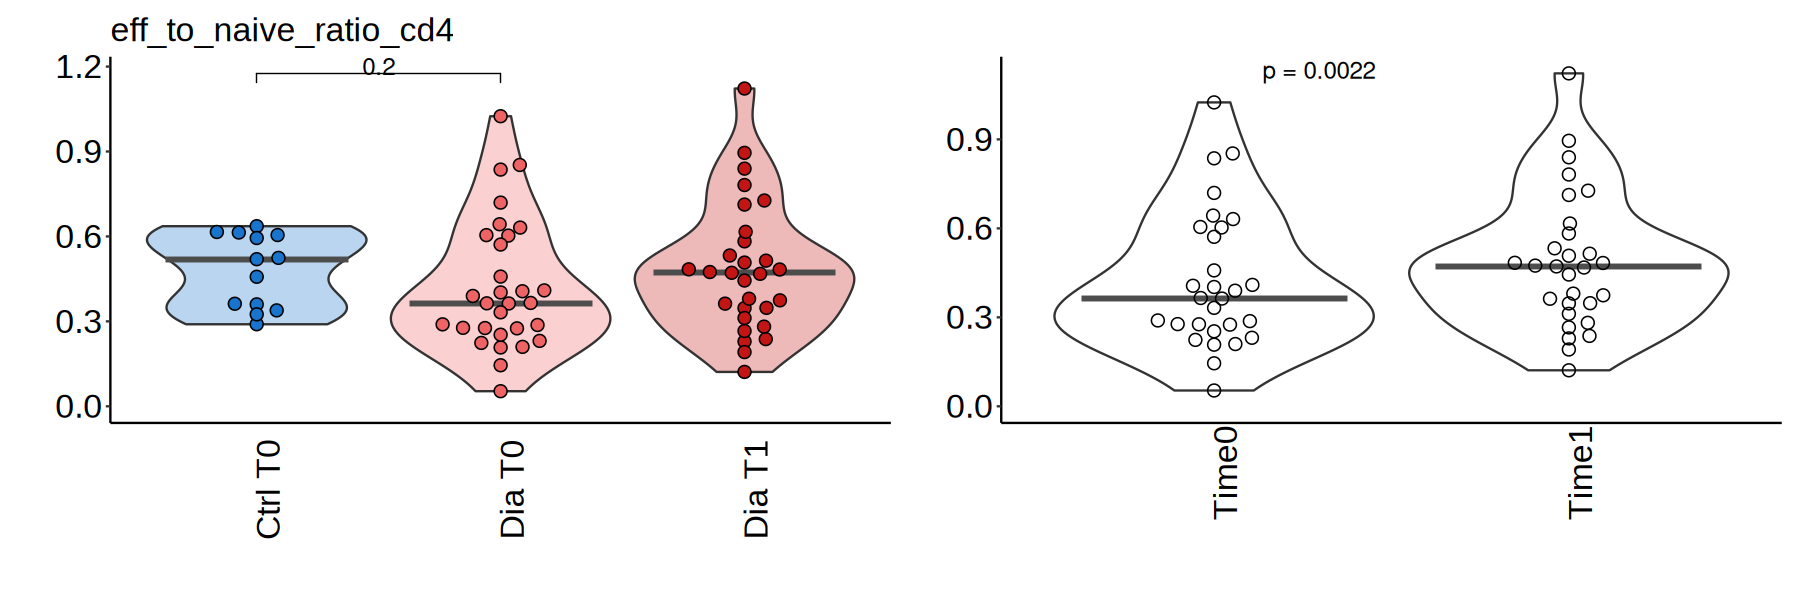

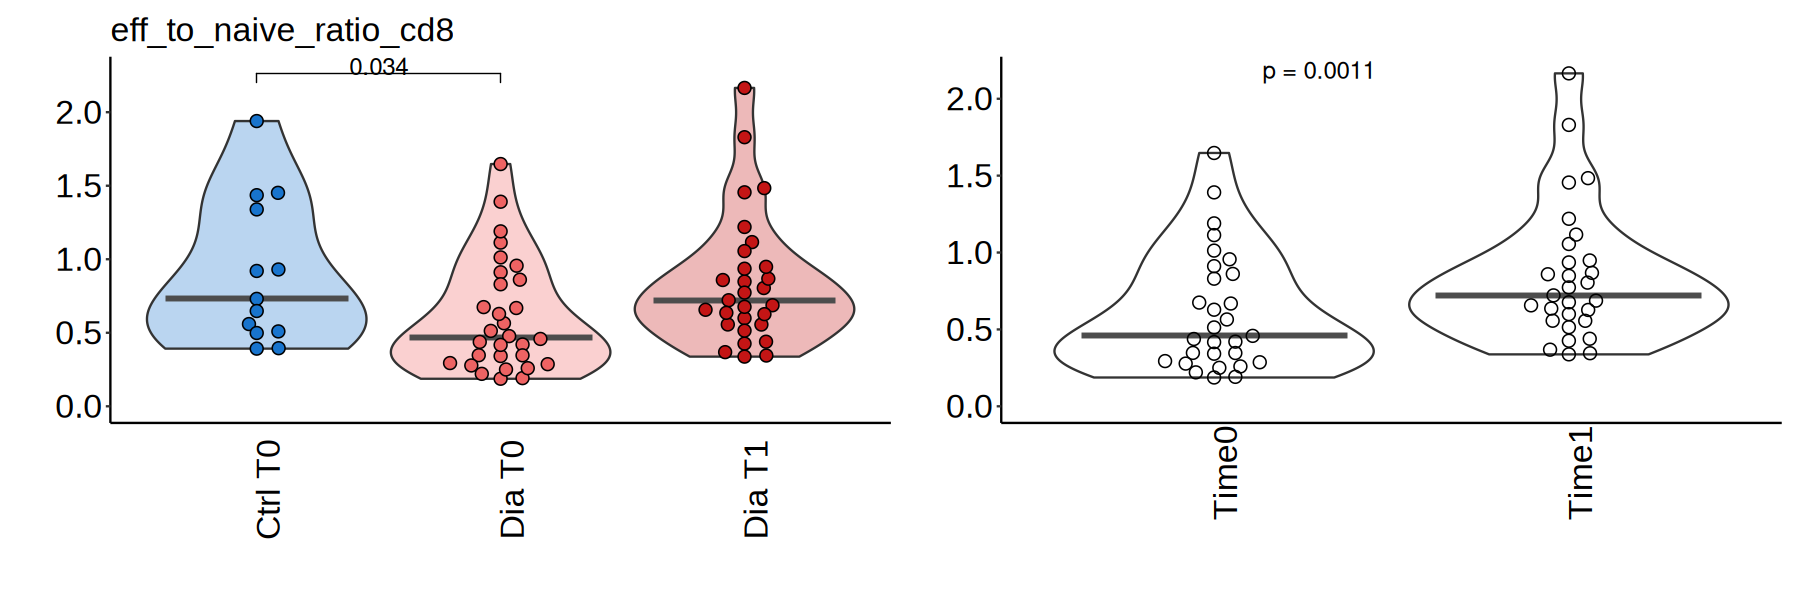

In [5]:
for(i in c(77,78)){
    
# Plot difference between groups (Statistics = Dia T0 vs Ctrl)
  df_filt <- df %>% mutate(Condition = if_else(substr(patient,1,1)=="1","Dia","Ctrl")) %>% 
    mutate(Condition = paste(Condition, time_taken))
     df_filt <- df_filt[,c(1:10,79,i)]
  colnames(df_filt) <- c(colnames(df_filt[1:10]), "Condition","value")
  df_filt$value <- as.numeric(df_filt$value)

    plot  <- df_filt  %>% 
 ggplot(aes(x = Condition, y = value)) + 
 geom_violin(alpha = 0.3, aes(fill = Condition), scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", corral = "random") +
ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", comparisons = list(c(1,2)), 
                           size = 5, vjust = 0.3, label = "p.format") +
    scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ggtitle(colnames(df)[i]) + ggtheme() + NoLegend()
    
# Plot difference between Dia T0 and Dia T1 (Statistics = Dia T0 vs Dia T1)
        df_filt <- df %>% mutate(Condition = if_else(substr(patient,1,1)=="1","Dia","Ctrl")) %>% 
    mutate(Condition = paste(Condition, time_taken))  %>% 
    dplyr::filter(Condition %in% c("Dia T0", "Dia T1"))
     df_filt <- df_filt[,c(1:10,79,i)]
  colnames(df_filt) <- c(colnames(df_filt[1:10]), "Condition","value")
  df_filt$value <- as.numeric(df_filt$value)
    
df_filt <- df_filt  %>% dplyr::select(patient, time_taken, value)  %>% 
pivot_wider(names_from = time_taken, values_from = value) 
colnames(df_filt)  <- c("Patient_ID","Time0","Time1")
 df_filt <- df_filt %>% dplyr::filter(!is.na(Time1)&(!is.na(Time0)))
    df_filt <- df_filt  %>% pivot_longer(!Patient_ID, names_to = "TimePoint", values_to = "value")
    
plot2 <- df_filt  %>% 
  ggplot(aes(x = TimePoint,
             y = value)) +
geom_violin(alpha = 0.3, scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, cex = 3, 
                shape = 21, color = "black", corral = "random") +
ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", paired = TRUE, 
                           size = 5, vjust = 0.3, label = "p.format") +
scale_fill_manual(values = c("#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ylim(0,NA)+
  plot_annotation(
    title = paste(stringr::str_replace_all(string = colnames(df)[i], pattern = "/", replacement = "\n")) ,
    theme = theme(plot.title = element_text(size = 8), 
                  plot.subtitle = element_text(size = 8),
                 axis.text.x = element_blank())) + ggtheme() + NoLegend()
   
  # Combine the two plots together
   plot  <- plot + plot2 
    
   # Render the plot
   print( plot)
 
   # Save the plot 
   # ggsave(paste0("../figures/cohort_characterization/sort_percentages/png/",paste0("plot_",i),".png"), 
   #    width = 12, height = 10, units = "cm", create.dir = T)
   # ggsave(paste0("../figures/cohort_characterization/sort_percentages/svg/",paste0("plot_",i),".svg"), 
   #    width = 12, height = 10, units = "cm", create.dir = T)
}

## Flow cytometry extracellular panel

Read the results from flow cytometry experiment. 

In [27]:
dir.create("../figures/flow/extracellular_240604_v06/")

In [163]:
extra_gating  <- read_xlsx("../tables/flow/240603_Extracellular.xlsx")

In [164]:
extra_gating$Condition  <- paste(extra_gating$Disease, extra_gating$TimePoint)

Create new columns containing ratios of Naive and NonNaive

In [31]:
extra_gating$Naive_to_Eff_CD8  <- extra_gating$CD8_Naive/extra_gating$CD8_NonNaive
extra_gating$Naive_to_Eff_CD4  <- extra_gating$CD4_Naive/extra_gating$CD4_NonNaive
extra_gating$Naive_to_Eff_CD8_10  <- extra_gating$CD8_Naive10/extra_gating$CD8_NonNaive10
extra_gating$Naive_to_Eff_CD4_10  <- extra_gating$CD4_Naive10/extra_gating$CD4_NonNaive10


In [165]:
colnames(extra_gating)

[1] "Sample:"                                                                                                         
 [2] "SpecimenID"                                                                                                      
 [3] "Disease"                                                                                                         
 [4] "Patient_ID"                                                                                                      
 [5] "TimePoint"                                                                                                       
 [6] "CD3+ | Freq. of Parent"                                                                                          
 [7] "CD3+| CD4+ | Freq. of Parent"                                                                                    
 [8] "CD4_Naive"                                                                                                       
 [9] "CD4_NonNaive"                                                                                                    
[10] "CD3+| CD8+ | Freq. of Parent"                                                                                    
[11] "CD8_Naive"                                                                                                       
[12] "CD3+| CD8+| Naive4 | Geometric Mean (CD56)"                                                                      
[13] "CD3+| CD8+| Naive4 | Geometric Mean (CD16)"                                                                      
[14] "CD3+| CD8+| Naive4 | Geometric Mean (TCRgd)"                                                                     
[15] "CD8_NonNaive"                                                                                                    
[16] "CD3+| CD8+| NonNaive4 | Geometric Mean (CD56)"                                                                   
[17] "CD3+| CD8+| NonNaive4 | Geometric Mean (CD16)"                                                                   
[18] "CD3+| CD8+| NonNaive4 | Geometric Mean (TCRgd)"                                                                  
[19] "CD3+| CD8low | Freq. of Parent"                                                                                  
[20] "CD3+| CD8low | Geometric Mean (CD56)"                                                                            
[21] "CD3+| CD8low | Geometric Mean (CD16)"                                                                            
[22] "CD3+| CD8low | Geometric Mean (TCRgd)"                                                                           
[23] "CD3- CD16+ | Freq. of Parent"                                                                                    
[24] "CD3- CD16+ | Geometric Mean (CD56)"                                                                              
[25] "CD3- CD16+ | Geometric Mean (CD16)"                                                                              
[26] "CD3- CD16+ | Geometric Mean (TCRgd)"                                                                             
[27] "CD3- CD16+| CD8+CD56+ | Freq. of Parent"                                                                         
[28] "CD3- CD16+| CD8-CD56+ | Freq. of Parent"                                                                         
[29] "CD3- CD16+| CD8-CD56- | Freq. of Parent"                                                                         
[30] "CD4_Naive10"                                                                                                     
[31] "CD4_NonNaive10"                                                                                                  
[32] "CD8_Naive10"                                                                                                     
[33] "CD8_NonNaive10"                                                                                                  
[34] "FlowAIGoodEvents/Lymphocytes/Single

Print plots and save. 

In [35]:
for(i in c(6:33)){
  print(i)
  df_filt <- extra_gating %>% 
    dplyr::select(1:5,36,i)
  colnames(df_filt) <- c(colnames(df_filt[c(1:6)]), "value")
  df_filt$value <- as.numeric(df_filt$value)

# Plot difference between Dia T0 and Healthy (Statistics = Dia T0 vs HD)
   
    plot <- df_filt %>% 
  ggplot(aes(x = Condition,
             y = value)) +
geom_violin(alpha = 0.3, aes(fill = Condition), scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", corral = "random") +
ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", comparisons = list(c(1,2)), 
                           size = 5, vjust = 0.3, label = "p.format") +
    scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ylim(0,NA)+
  plot_annotation(
    title = paste(stringr::str_replace_all(string = colnames(extra_gating)[i], pattern = "/", replacement = "\n")) ,
    theme = theme(plot.title = element_text(size = 8), 
                  plot.subtitle = element_text(size = 8),
                 axis.text.x = element_blank())) + ggtheme() + NoLegend()
    
      df_filt <- extra_gating %>% 
    filter(Condition != "0 0")   %>% 
    dplyr::select(4,5,i) 
  colnames(df_filt) <- c(colnames(df_filt[c(1:2)]), "value")
  df_filt$value <- as.numeric(df_filt$value)
df_filt <- df_filt  %>% pivot_wider(names_from = TimePoint, values_from = value) 
colnames(df_filt)  <- c("Patient_ID","Time1","Time0")
 df_filt <- df_filt %>% dplyr::filter(!is.na(Time1)&(!is.na(Time0)))
    df_filt <- df_filt  %>% pivot_longer(!Patient_ID, names_to = "TimePoint", values_to = "value")
 
# Plot difference between Dia T0 and Dia T1 (Statistics = Dia T0 vs Dia T1)
    
plot2 <- df_filt  %>% 
  ggplot(aes(x = TimePoint,
             y = value)) +
geom_violin(alpha = 0.3, scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, cex = 3, 
                shape = 21, color = "black", corral = "random") +
ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", paired = TRUE, 
                           size = 5, vjust = 0.3, label = "p.format") +
scale_fill_manual(values = c("#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ylim(0,NA)+
  plot_annotation(
    title = paste(stringr::str_replace_all(string = colnames(extra_gating)[i], pattern = "/", replacement = "\n")) ,
    theme = theme(plot.title = element_text(size = 8), 
                  plot.subtitle = element_text(size = 8),
                 axis.text.x = element_blank())) + ggtheme() + NoLegend()

    plot  <- plot + plot2
    plot
   
    ggsave(create.dir = TRUE, paste0("../figures/flow/extracellular_240604_v06/",paste0("plot_",i),".png"), 
         width = 13, height = 10, units = "cm")
   ggsave(create.dir = TRUE, paste0("../figures/flow/extracellular_240604_v06/",paste0("plot_",i),".svg"), 
        width = 13, height = 10, units = "cm")
}


[1] 6


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(53.3, 42.6, 54.2, 46, 46.9, 68.7, 38.7, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(53.3, 42.6, 54.2, 46, 46.9, 68.7, 38.7, :
“cannot compute exact p-value with ties”


[1] 7


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(44.2, 25.3, 54.3, 39.4, 30, 26.6, 34.1, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(44.2, 25.3, 54.3, 39.4, 30, 26.6, 34.1, :
“cannot compute exact p-value with ties”


[1] 8


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] 9


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(67.5, 76.2, 71.7, 61.4, 69.3, 65.6, 60.7, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(67.5, 76.2, 71.7, 61.4, 69.3, 65.6, 60.7, :
“cannot compute exact p-value with ties”


[1] 10


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(27.8, 48.7, 26, 41.2, 37.8, 26.8, 46.3, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(27.8, 48.7, 26, 41.2, 37.8, 26.8, 46.3, :
“cannot compute exact p-value with ties”


[1] 11


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(33.7, 44.4, 43.3, 36.5, 40.8, 33.4, 49.3, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(33.7, 44.4, 43.3, 36.5, 40.8, 33.4, 49.3, :
“cannot compute exact p-value with ties”


[1] 12


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(948, 1529, 1117, 1097, 1060, 1300, 1040, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(948, 1529, 1117, 1097, 1060, 1300, 1040, :
“cannot compute exact p-value with ties”


[1] 13


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] 14


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] 15


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(66.3, 55.4, 56.7, 63.2, 59.2, 66.3, 50.7, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(66.3, 55.4, 56.7, 63.2, 59.2, 66.3, 50.7, :
“cannot compute exact p-value with ties”


[1] 16


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] 17


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(1981, 2596, 1746, 2163, 1813, 2189, 1917, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1981, 2596, 1746, 2163, 1813, 2189, 1917, :
“cannot compute exact p-value with ties”


[1] 18


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] 19


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(6.12, 9.62, 4.94, 4.94, 8.53, 10.8, 5.91, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(6.12, 9.62, 4.94, 4.94, 8.53, 10.8, 5.91, :
“cannot compute exact p-value with ties”


[1] 20


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] 21


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] 22


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] 23


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(12.1, 28.4, 4.92, 22.3, 26.7, 19.1, 35.7, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(12.1, 28.4, 4.92, 22.3, 26.7, 19.1, 35.7, :
“cannot compute exact p-value with ties”


[1] 24


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] 25


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] 26


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(571, 785, 606, 739, 596, 784, 615, 697, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(571, 785, 606, 739, 596, 784, 615, 697, :
“cannot compute exact p-value with ties”


[1] 27


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(20.8, 32.2, 33.6, 47.4, 41.5, 26.7, 45.4, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(20.8, 32.2, 33.6, 47.4, 41.5, 26.7, 45.4, :
“cannot compute exact p-value with ties”


[1] 28


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(63.9, 57.8, 44.6, 46, 53, 62, 47.5, 69.2, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(63.9, 57.8, 44.6, 46, 53, 62, 47.5, 69.2, :
“cannot compute exact p-value with ties”


[1] 29


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(12.9, 8.33, 18.9, 5.61, 3.33, 10.1, 4.21, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(12.9, 8.33, 18.9, 5.61, 3.33, 10.1, 4.21, :
“cannot compute exact p-value with ties”


[1] 30


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(10.9, 11.1, 10.5, 18.1, 8.41, 15.3, 9.59, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(10.9, 11.1, 10.5, 18.1, 8.41, 15.3, 9.59, :
“cannot compute exact p-value with ties”


[1] 31


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(88.6, 88.1, 88.7, 80.6, 90.6, 83.8, 89.7, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(88.6, 88.1, 88.7, 80.6, 90.6, 83.8, 89.7, :
“cannot compute exact p-value with ties”


[1] 32


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(24.5, 38.7, 30.1, 31.7, 28.5, 28.6, 35.1, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(24.5, 38.7, 30.1, 31.7, 28.5, 28.6, 35.1, :
“cannot compute exact p-value with ties”


[1] 33


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(75, 62.5, 70.3, 69.2, 71.9, 72, 66.8, 80.3, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(75, 62.5, 70.3, 69.2, 71.9, 72, 66.8, 80.3, :
“cannot compute exact p-value with ties”


## Characterization of TCRgd and Cd8low cells

For characterization of Tr3-56 cells by flow cytometry, we will need to see the abundance of selected markers in different subpopulations. 

In [36]:
extra_gating

Sample:,SpecimenID,Disease,Patient_ID,TimePoint,CD3+ | Freq. of Parent,CD3+| CD4+ | Freq. of Parent,CD4_Naive,CD4_NonNaive,CD3+| CD8+ | Freq. of Parent,⋯,CD3- CD16+| CD8-CD56- | Freq. of Parent,CD4_Naive10,CD4_NonNaive10,CD8_Naive10,CD8_NonNaive10,Condition,Naive_to_Eff_CD8,Naive_to_Eff_CD4,Naive_to_Eff_CD8_10,Naive_to_Eff_CD4_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A2 101b.fcs,1,1,101,1,33.70,44.4,56.20,43.1,39.9,⋯,40.90,34.20,64.6,39.20,61.8,1 1,0.7917415,1.30394432,0.63430421,0.52941176
A2 107.fcs,2,1,107,0,62.00,27.6,49.10,50.0,43.7,⋯,16.80,19.20,78.6,21.10,79.2,1 0,0.4903130,0.98200000,0.26641414,0.24427481
A3 102b.fcs,3,1,102,1,43.30,38.7,60.10,39.1,45.9,⋯,44.90,37.80,60.9,40.60,60.1,1 1,0.8130672,1.53708440,0.67554077,0.62068966
A3 107b.fcs,4,1,107,1,65.00,34.8,55.20,44.0,41.1,⋯,15.50,24.90,73.9,30.10,70.8,1 1,0.8163636,1.25454545,0.42514124,0.33694181
A4 103b.fcs,5,1,103,1,60.00,46.3,31.50,67.7,31.4,⋯,4.55,17.00,82.1,30.90,70.0,1 1,0.5901116,0.46528804,0.44142857,0.20706456
A4 109.fcs,6,1,109,0,17.90,38.9,26.40,73.1,32.7,⋯,28.60,8.97,90.3,21.40,78.0,1 0,0.5723270,0.36114911,0.27435897,0.09933555
A5 106b.fcs,7,1,106,1,48.90,45.2,38.50,60.9,29.9,⋯,81.10,18.90,79.8,38.90,62.1,1 1,0.8293578,0.63218391,0.62640902,0.23684211
A5 109b.fcs,8,1,109,1,7.64,21.4,6.38,93.6,47.3,⋯,30.50,0.00,95.7,8.65,92.3,1 1,0.2836970,0.06816239,0.09371614,0.00000000
A6 104.fcs,9,1,104,0,59.50,61.9,46.80,52.7,32.4,⋯,7.28,30.00,68.8,44.40,56.2,1 0,0.9174664,0.88804554,0.79003559,0.43604651


We will be using the columns containing Geometric mean values of the intensities of CD56, TCRgd and CD16. 

In [37]:
geomean_values  <- c("CD56","TCRgd","CD16")

In the following script, we will extract the columns containing the geomean values and visualize them per each of the populations: Naive, NonNaive, Cd8low and NK cells. 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.gra

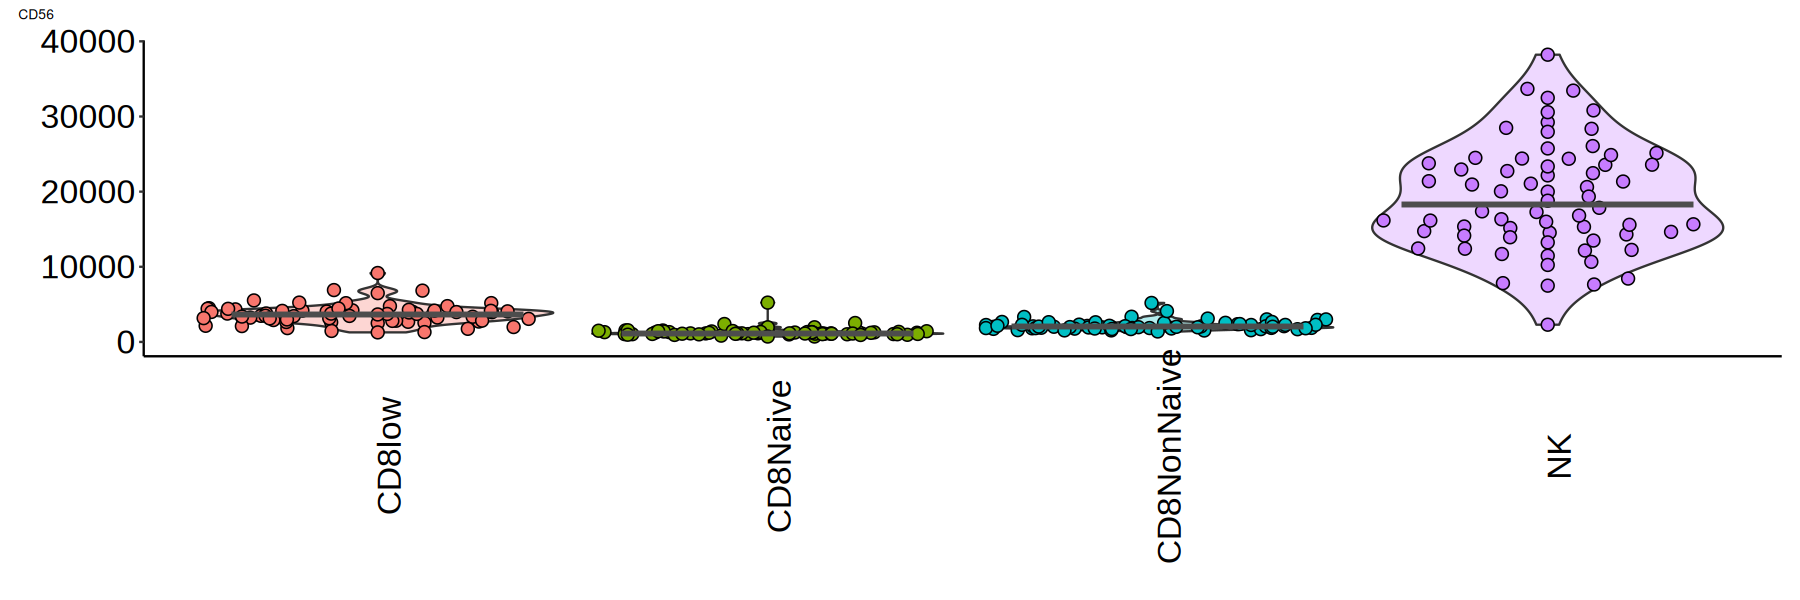

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.gra

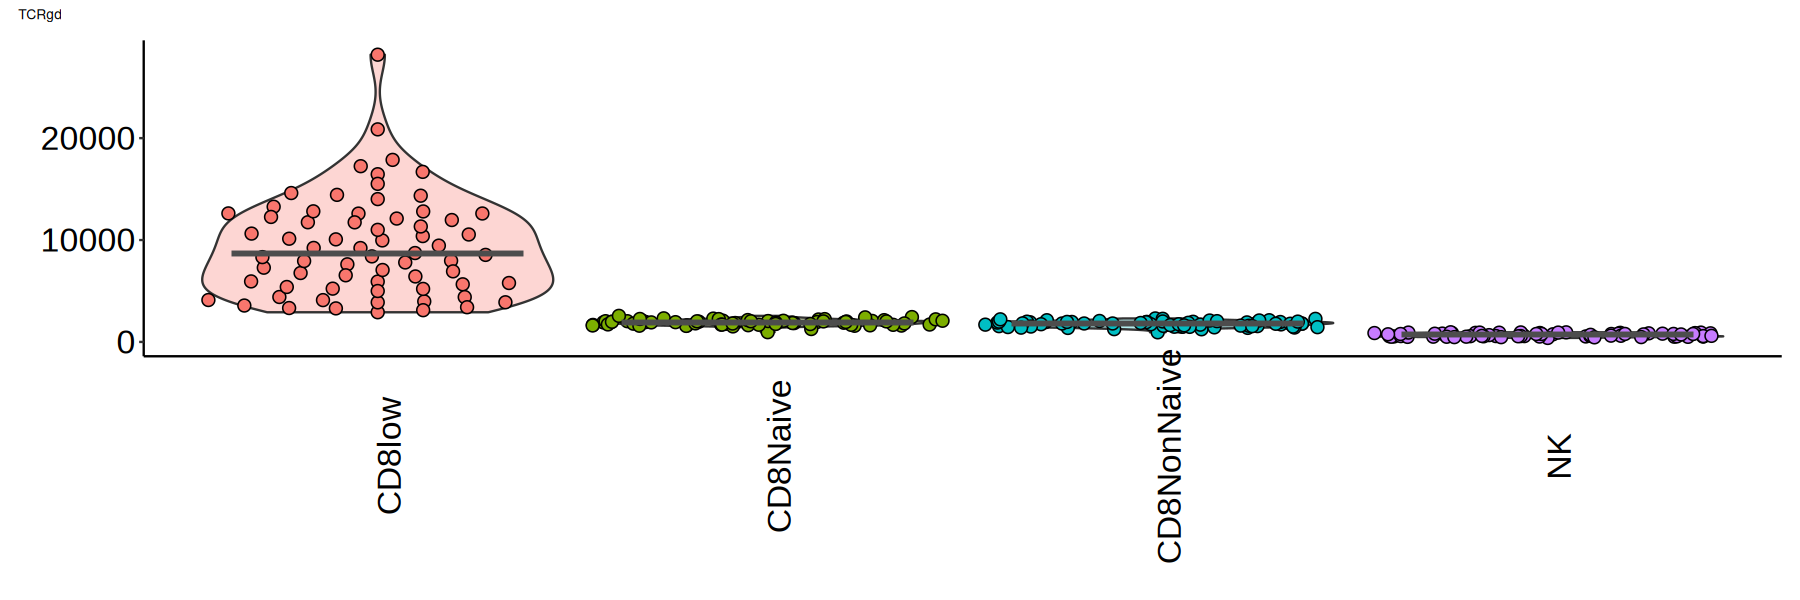

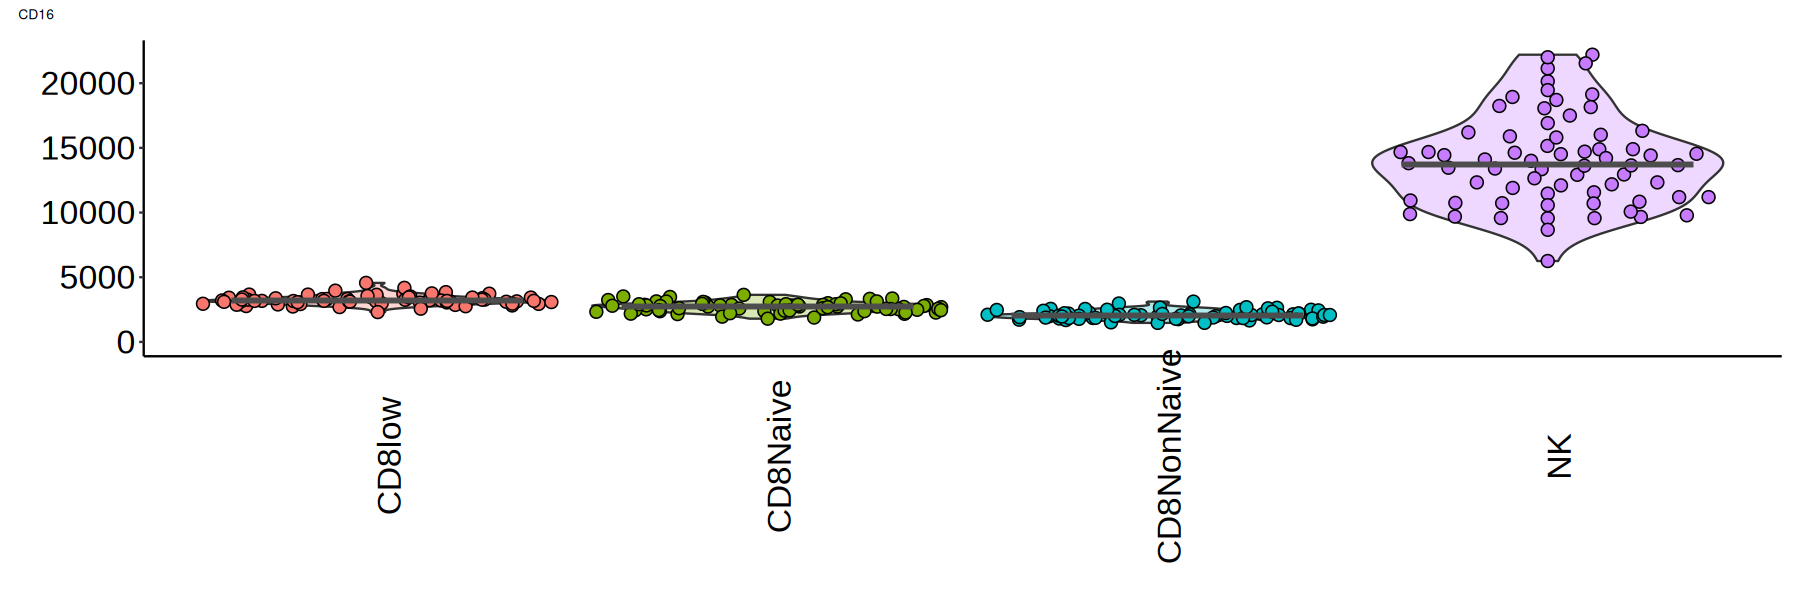

In [43]:
for(i in geomean_values){
    
# Extrace selected columns from the table
  df_filt <- extra_gating %>% 
    dplyr::select(1:5,30,which(grepl(colnames(extra_gating), pattern = paste0("Geometric Mean \\(",i))))
    
# Rename column names to populations
colnames(df_filt) <- c(colnames(df_filt[c(1:6)]), "CD8Naive", "CD8NonNaive", "CD8low", "NK")
 
# Reshape data.frame
    df_filt <- df_filt %>% 
    pivot_longer(cols = c(7:10), names_to = "Population", values_to = "value")

# Prepare the plot    
    plot <- df_filt %>% 
  ggplot(aes(x = Population,
             y = value)) +
geom_violin(alpha = 0.3, aes(fill = Population), scale = "width") + 
geom_beeswarm(size = 3, aes(fill = Population), cex = 3, 
                shape = 21, color = "black", corral = "random") +
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ylim(0,NA)+
  plot_annotation(
    title = i ,
    theme = theme(plot.title = element_text(size = 8), 
                  plot.subtitle = element_text(size = 8),
                 axis.text.x = element_blank())) + ggtheme() + NoLegend()
    print(plot)
    
# Save the plot 
    ggsave(create.dir = TRUE, paste0("../figures/flow/cd8_low_Tgd_char/",paste0("plot_",i),".png"), 
         width = 13, height = 20, units = "cm")
    ggsave(create.dir = TRUE, paste0("../figures/flow/cd8_low_Tgd_char/",paste0("plot_",i),".svg"), 
         width = 13, height = 20, units = "cm")
}

## Analysis of Treg cells

First, let's load file with percentages of Treg cells from flow data. 

In [62]:
intra02_All2  <- read_xlsx("../tables/flow/240915_Intracellular_Treg.xlsx")

In [63]:
intra02_All2

Sample:,SpecimenID,Disease,Patient_ID,TimePoint,"CD4, SSC-A subset/Foxp3, SSC-A subset | Freq. of Parent","CD4, SSC-A subset/Foxp3, SSC-A subset/CD226, CD127 subset | Freq. of Parent","CD4, SSC-A subset/Foxp3, SSC-A subset/CD45RA, SSC-A subset | Freq. of Parent","CD4, SSC-A subset/Foxp3, SSC-A subset/41BB, CD45RO subset | Freq. of Parent"
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2 101b.fcs,1,1,101,1,11.10,0.00,16.50,3.09
A2 107.fcs,2,1,107,0,6.30,0.00,15.00,11.50
A3 102b.fcs,3,1,102,1,5.34,3.23,29.00,19.40
A3 107b.fcs,4,1,107,1,8.80,0.00,7.98,6.10
A4 103b.fcs,5,1,103,1,7.36,1.71,16.60,18.30
A4 109.fcs,6,1,109,0,7.20,1.92,11.50,3.85
A5 106b.fcs,7,1,106,1,9.59,1.82,24.10,10.90
A5 109b.fcs,8,1,109,1,17.60,0.00,9.52,0.00
A6 104.fcs,9,1,104,0,6.01,1.14,30.70,11.90


We'll create new column Condition based on Disease and Timepoint. 

In [18]:
intra02_All2$Condition  <- paste(intra02_All2$Disease, intra02_All2$TimePoint)

Plot the violin plots for figure. Statistics is provided to compare T1D T0 and Healthy. 

In [21]:
for(i in c(6:9)){
  
  df_filt <- intra02_All2 %>% 
    dplyr::select(1:5,10,i)
  colnames(df_filt) <- c(colnames(df_filt[c(1:6)]), "value")
  df_filt$value <- as.numeric(df_filt$value)

plot <- df_filt %>% 
  ggplot(aes(x = Condition,
             y = value)) +
    geom_violin(alpha = 0.3, aes(fill = Condition), scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", corral = "random") +
ggpubr::stat_compare_means(size = 7, label = "p.format", comparisons = list(c(1,2)))+
scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ylim(0,NA)+
  plot_annotation(
    title = paste(stringr::str_replace_all(string = colnames(intra02_All2)[i], pattern = "/", replacement = "\n")) ,
    theme = theme(plot.title = element_text(size = 8), 
                  plot.subtitle = element_text(size = 8),
                 axis.text.x = element_blank())) + ggtheme() + NoLegend()
    
  ggsave(paste0("../figures/flow/250401_treg_dia_vs_hd/",paste0("plot_",i),".png"), 
         create.dir = TRUE, width = 7.5, height = 15, units = "cm")
  ggsave(paste0("../figures/flow/250401_treg_dia_vs_hd/",paste0("plot_",i),".svg"), 
         width = 7.5, height = 10, units = "cm")
    }

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(8.27, 11.7, 6.47, 2.91, 6.77, 5.05, 4.2, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(8.27, 11.7, 6.47, 2.91, 6.77, 5.05, 4.2, :
“cannot compute exact p-value with ties”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(0, 0, 6.06, 8.57, 1.14, 1.83, 0, 0, 0, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 6.06, 8.57, 1.14, 1.83, 0, 0, 0, :
“cannot compute exact p-value with ties”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 1 row containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_summary()`).”
Warning 

Plot the violin plots for figure. Statistics is provided to compare T1D T0 and T1D T1. 

In [ ]:
for(i in c(6:29)){
  
  df_filt <- intra02_All2 %>% 
    dplyr::select(1:5,30,i)
  colnames(df_filt) <- c(colnames(df_filt[c(1:6)]), "value")
  df_filt$value <- as.numeric(df_filt$value)

plot <- df_filt %>% 
  ggplot(aes(x = Condition,
             y = value)) +
    geom_violin(alpha = 0.3, aes(fill = Condition), scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", corral = "random") +
ggpubr::stat_compare_means(size = 7, label = "p.format", comparisons = list(c(2,3)))+
scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  #ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  #ylim(0,NA)+
  plot_annotation(
    title = paste(stringr::str_replace_all(string = colnames(intra02_All2)[i], pattern = "/", replacement = "\n")) ,
    theme = theme(plot.title = element_text(size = 8), 
                  plot.subtitle = element_text(size = 8),
                 axis.text.x = element_blank())) + ggtheme() + NoLegend()
    
   ggsave(paste0("../figures/flow/250401_treg_t0_vs_t1/",paste0("plot_",i),".png"), 
        create.dir = TRUE, width = 7.5, height = 16, units = "cm")
   ggsave(paste0("../figures/flow/250401_treg_t0_vs_t1/",paste0("plot_",i),".svg"), 
         width = 7.5, height = 16, units = "cm")
    }

## Flow cytometry intracellular panel

Read the data from intracellular flow cytometry.

In [99]:
intra02_All2  <- read_xlsx("../tables/flow/240516_Intracellular_CD8.xlsx")

Create a new column with Condition. 

In [100]:
intra02_All2$Condition  <- paste(intra02_All2$Disease, intra02_All2$TimePoint)

Plots for figure. 

In [61]:
for(i in c(6:21)){
  df_filt <- intra02_All2 %>% 
    dplyr::select(1:5,22,i)
  colnames(df_filt) <- c(colnames(df_filt[c(1:6)]), "value")
  df_filt$value <- as.numeric(df_filt$value)

#print(df_filt)
plot <- df_filt %>% 
  ggplot(aes(x = Condition,
             y = value)) +
geom_violin(alpha = 0.3, aes(fill = Condition), scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", corral = "random") +
ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", comparisons = list(c(1,2)), 
                           size = 5, vjust = 0.3, label = "p.format") +
    scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ylim(0,NA)+
  plot_annotation(
    title = paste(stringr::str_replace_all(string = colnames(intra02_All2)[i], pattern = "/", replacement = "\n")) ,
    theme = theme(plot.title = element_text(size = 8), 
                  plot.subtitle = element_text(size = 8),
                 axis.text.x = element_blank())) + ggtheme() + NoLegend()
    
      df_filt <- intra02_All2 %>% 
    filter(Condition != "0 0")   %>% 
    dplyr::select(4,5,i) 
  colnames(df_filt) <- c(colnames(df_filt[c(1:2)]), "value")
  df_filt$value <- as.numeric(df_filt$value)
df_filt <- df_filt  %>% pivot_wider(names_from = TimePoint, values_from = value) 
colnames(df_filt)  <- c("Patient_ID","Time1","Time0")
 df_filt <- df_filt %>% dplyr::filter(!is.na(Time1)&(!is.na(Time0)))
    df_filt <- df_filt  %>% pivot_longer(!Patient_ID, names_to = "TimePoint", values_to = "value")
    
plot2 <- df_filt  %>% 
  ggplot(aes(x = TimePoint,
             y = value)) +
geom_violin(alpha = 0.3, scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, cex = 3, 
                shape = 21, color = "black", corral = "random") +
ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", paired = TRUE, 
                           size = 5, vjust = 0.3, label = "p.format") +
scale_fill_manual(values = c("#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ylim(0,NA)+
  plot_annotation(
    title = paste(stringr::str_replace_all(string = colnames(intra02_All2)[i], pattern = "/", replacement = "\n")) ,
    theme = theme(plot.title = element_text(size = 8), 
                  plot.subtitle = element_text(size = 8),
                 axis.text.x = element_blank())) + ggtheme() + NoLegend()

    plot  <- plot + plot2
    plot
  ggsave(paste0("../figures/flow/250401_intracellular/",paste0("plot_",i),".png"), 
          width = 14, height = 9.5, units = "cm")
  ggsave(paste0("../figures/flow/250401_intracellular/",paste0("plot_",i),".svg"), 
         width = 14, height = 9.5, units = "cm")
}

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
✔ Created directory: ../../../Project Diabetes Motol/FACS validation/Final_Analysis_VN/Intracellular02_CD8/05_Results/R_plots/results_250401_v7_v10.

Warning message in wilcox.test.default(c(19.5, 15.7, 21.8, 3.22, 21, 7.28, 12.2, :
“cannot compute exact p-value with ties”
✔ Created directory: ../../../Project Diabetes Motol/FACS validation/Final_Analysis_VN/Intracellular02_CD8/05_Results/R_plots/results_2400401_v7_v10.

Warning message in wilcox.test.default(c(19.5, 15.7, 21.8, 3.22, 21, 7.28, 12.2, :
“cannot compute exact p-value with ties”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(27.7, 11.5, 35

Warning message in wilcox.test.default(c(14709, 14015, 15211, 15769, 14180, 16192, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(14709, 14015, 15211, 15769, 14180, 16192, :
“cannot compute exact p-value with ties”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in wilcox.test.default(c(54588, 65458, 18181, 97860, 57366, 184536, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(54588, 65458, 18181, 97860, 57366, 184536, :
“cannot compute exact p-value with ties”


# Correlation with scRNAseq frequencies

In this part, we will evaluate the correlation between frequencies of populations in scRNAseq dataset and the same populations measured by flow cytometry. 

Let's start by loading frequencies of CD4+ populations. 

In [187]:
population_freq  <- read_csv("../tables/populations_freq/freq_for_model_cd4.csv")

New names:
• `` -> `...1`
Rows: 4002 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): annotations_manual, dataset, Main, Level, Condition, Condition2, D...
dbl  (6): ...1, Sample_ID, freq, Age, Age_group, Patient_ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [188]:
population_freq$prelim_final  <- ifelse(population_freq$Experiment_ID %in% c("Exp10", "Exp11"), "Prelim", "Final")

First, let's focus on Naive CD4+ T cells. 

### Naive CD4

In [196]:
freq_cd4_naive  <- population_freq  %>% dplyr::filter(Level == "l2" & grepl(annotations_manual, pattern = "Naive"))  %>% 
dplyr::select(annotations_manual, Level, freq, Patient_ID, Time, prelim_final)  %>% unique  %>% 
mutate(Patient_Time = paste(Patient_ID, Time))

In [197]:
freq_cd4_naive

annotations_manual,Level,freq,Patient_ID,Time,prelim_final,Patient_Time
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Naive,l2,0.8420382,105,T0,Prelim,105 T0
Naive,l2,0.7968545,106,T0,Prelim,106 T0
Naive,l2,0.7680412,110,T0,Prelim,110 T0
Naive,l2,0.7838180,111,T0,Prelim,111 T0
Naive,l2,0.7023196,108,T0,Prelim,108 T0
Naive,l2,0.7935393,104,T0,Prelim,104 T0
Naive,l2,0.7115677,209,T0,Prelim,209 T0
Naive,l2,0.6536232,121,T0,Prelim,121 T0
Naive,l2,0.6755486,126,T0,Prelim,126 T0


The FACS percentages will be taken from the flow cytometry tables from above. 

In [198]:
extra_gating$Patient_Time  <- paste0(extra_gating$Patient_ID, " T", extra_gating$TimePoint)

Join the FACS percentages and the scRNAseq percentages. 

In [199]:
df2 <- extra_gating  %>% dplyr::select(Patient_Time, CD4_Naive)  %>% left_join(freq_cd4_naive)

Joining with `by = join_by(Patient_Time)`


In [200]:
df2

Patient_Time,CD4_Naive,annotations_manual,Level,freq,Patient_ID,Time,prelim_final
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
101 T1,56.20,Naive,l2,0.24286879,101,T1,Final
107 T0,49.10,Naive,l2,0.86143791,107,T0,Prelim
107 T0,49.10,Naive,l2,0.37933526,107,T0,Final
102 T1,60.10,Naive,l2,0.25958965,102,T1,Final
107 T1,55.20,Naive,l2,0.29280949,107,T1,Final
103 T1,31.50,Naive,l2,0.20268139,103,T1,Final
109 T0,26.40,Naive,l2,0.41763566,109,T0,Final
106 T1,38.50,Naive,l2,0.16422287,106,T1,Final
109 T1,6.38,Naive,l2,0.26172301,109,T1,Final


Plot the correlation. 

`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not f

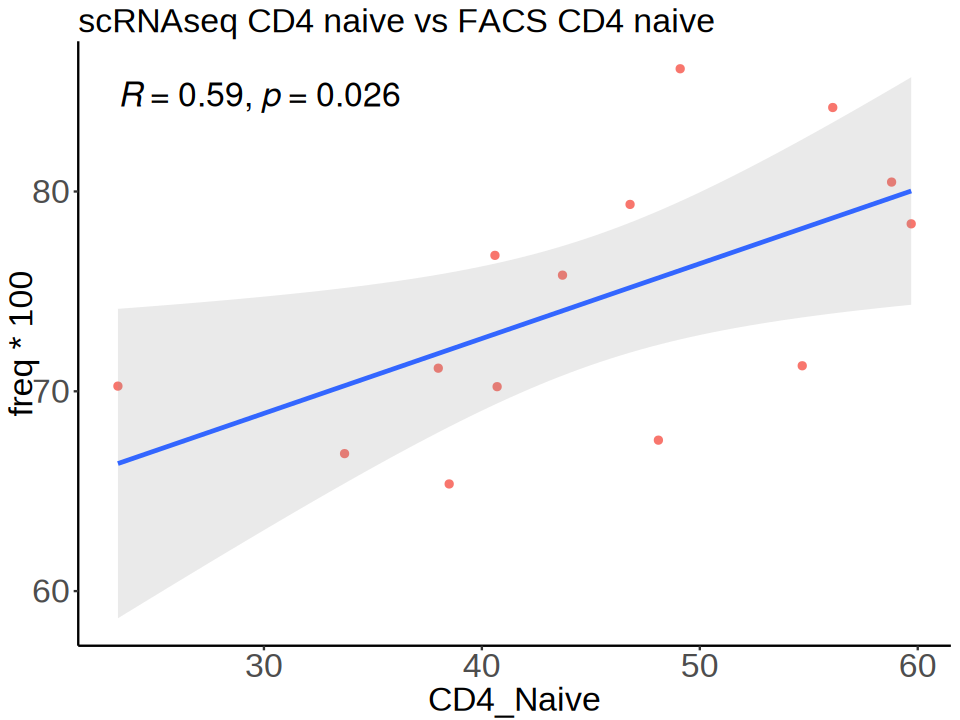

In [204]:
options(repr.plot.width = 8, repr.plot.height = 6)

df2 %>% 
dplyr::filter(prelim_final == "Prelim")  %>% 
ggplot(aes(x=CD4_Naive, y=freq*100)) +
  geom_point(shape = 16, size = 2, aes(color = prelim_final)) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle("scRNAseq CD4 naive vs FACS CD4 naive") + 
stat_cor(size = 7) + theme_classic() + ggtheme() +
#facet_wrap(~prelim_final, scales = "free") + 
NoLegend()

In [205]:
ggsave("../figures/correlation_facs_scRNAseq/cd4_naive.png", 
       create.dir = TRUE,
       width = 10, height = 10, units = "cm")
ggsave("../figures/correlation_facs_scRNAseq/cd4_naive.svg", 
       width = 10, height = 10, units = "cm")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


### Treg

We will repeat the process for Treg cells. 

In [83]:
freq_cd4_treg  <- population_freq  %>% dplyr::filter(Level == "l2" & grepl(annotations_manual, pattern = "Treg"))  %>% 
dplyr::select(annotations_manual, Level, freq, Patient_ID, Time, prelim_final)  %>% unique  %>% 
mutate(Patient_Time = paste(Patient_ID, Time))

In [84]:
freq_cd4_treg

annotations_manual,Level,freq,Patient_ID,Time,prelim_final,Patient_Time
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Treg,l2,0.01910828,105,T0,Prelim,105 T0
Treg,l2,0.04325033,106,T0,Prelim,106 T0
Treg,l2,0.10180412,110,T0,Prelim,110 T0
Treg,l2,0.04171934,111,T0,Prelim,111 T0
Treg,l2,0.04768041,108,T0,Prelim,108 T0
Treg,l2,0.04494382,104,T0,Prelim,104 T0
Treg,l2,0.05859970,209,T0,Prelim,209 T0
Treg,l2,0.08260870,121,T0,Prelim,121 T0
Treg,l2,0.05329154,126,T0,Prelim,126 T0


In [85]:
intra02_All2

Sample:,SpecimenID,Disease,Patient_ID,TimePoint,"CD4, SSC-A subset/Foxp3, SSC-A subset | Freq. of Parent","CD4, SSC-A subset/Foxp3, SSC-A subset/CD226, CD127 subset | Freq. of Parent","CD4, SSC-A subset/Foxp3, SSC-A subset/CD45RA, SSC-A subset | Freq. of Parent","CD4, SSC-A subset/Foxp3, SSC-A subset/41BB, CD45RO subset | Freq. of Parent"
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2 101b.fcs,1,1,101,1,11.10,0.00,16.50,3.09
A2 107.fcs,2,1,107,0,6.30,0.00,15.00,11.50
A3 102b.fcs,3,1,102,1,5.34,3.23,29.00,19.40
A3 107b.fcs,4,1,107,1,8.80,0.00,7.98,6.10
A4 103b.fcs,5,1,103,1,7.36,1.71,16.60,18.30
A4 109.fcs,6,1,109,0,7.20,1.92,11.50,3.85
A5 106b.fcs,7,1,106,1,9.59,1.82,24.10,10.90
A5 109b.fcs,8,1,109,1,17.60,0.00,9.52,0.00
A6 104.fcs,9,1,104,0,6.01,1.14,30.70,11.90


In [110]:
df2  <-  intra02_All2  %>% 
mutate(Patient_Time = paste0(extra_gating$Patient_ID, " T", extra_gating$TimePoint))  %>% 
dplyr::select(Patient_Time, CD4_Treg = 6)  %>% left_join(freq_cd4_treg)

Joining with `by = join_by(Patient_Time)`


In [111]:
df2

Patient_Time,CD4_Treg,annotations_manual,Level,freq,Patient_ID,Time,prelim_final
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
101 T1,10.60,Treg,l2,0.16625917,101,T1,Final
107 T0,10.00,Treg,l2,0.05620915,107,T0,Prelim
107 T0,10.00,Treg,l2,0.19508671,107,T0,Final
102 T1,4.65,Treg,l2,0.16146298,102,T1,Final
107 T1,11.50,Treg,l2,0.18532246,107,T1,Final
103 T1,8.95,Treg,l2,0.11593060,103,T1,Final
109 T0,14.60,Treg,l2,0.12984496,109,T0,Final
106 T1,10.70,Treg,l2,0.09188661,106,T1,Final
109 T1,23.40,Treg,l2,0.14721919,109,T1,Final


`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not f

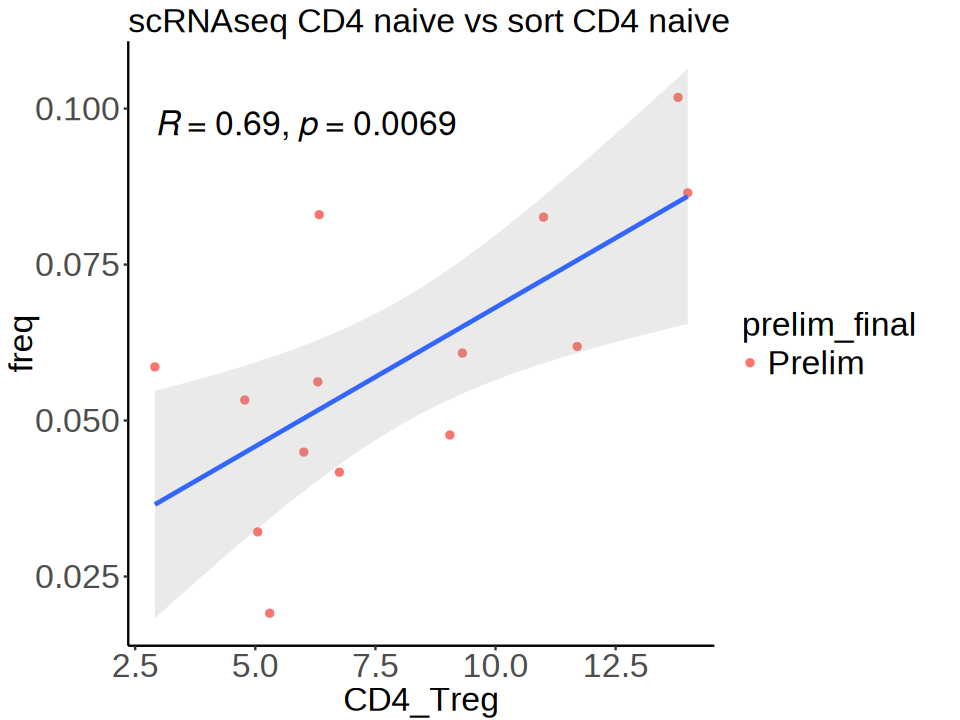

In [90]:
options(repr.plot.width = 8, repr.plot.height = 6)
 df2 %>% 
dplyr::filter(prelim_final == "Prelim")  %>% 
ggplot(aes(x=CD4_Treg, y=freq)) +
  geom_point(shape = 16, size = 2, aes(color = prelim_final)) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle("scRNAseq CD4 Treg vs FACS CD4 Treg") + 
stat_cor(size = 7) + theme_classic() + ggtheme()

`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not f

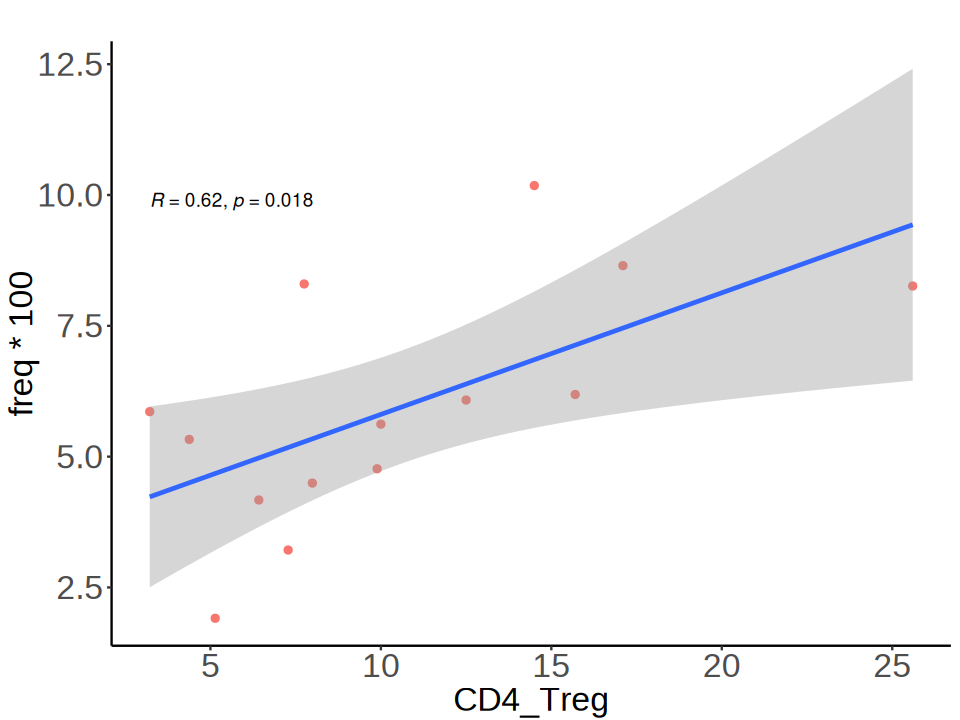

In [114]:
options(repr.plot.width = 8, repr.plot.height = 6)
 df2 %>% 
dplyr::filter(prelim_final == "Prelim")  %>% 
ggplot(aes(x=CD4_Treg, y=freq*100)) +
geom_point(shape = 16, size = 2, aes(color = factor(prelim_final))) +
 geom_smooth(method=lm) + ggtitle("") +stat_cor() + theme_classic() + ggtheme() +
 scale_y_continuous() + NoLegend() 

ggsave("../figures/correlation_facs_scRNAseq/treg.png", 
       create.dir = TRUE,
       width = 10, height = 10, units = "cm")
ggsave("../figures/correlation_facs_scRNAseq/treg.svg", 
       width = 10, height = 10, units = "cm")

### Naive CD8

We will repeat the process for Naive CD8 cells. 

In [119]:
population_freq_cd8  <- read_csv("../tables/populations_freq/cd8_freq.csv")

New names:
• `` -> `...1`
Rows: 4524 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): annotations, annot_l1, annot_l2, Condition, Condition2, Disease, S...
dbl (11): ...1, Sample_ID, n, Age, Age_group, Patient_ID, freq_from_total, t...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [121]:
population_freq_cd8

...1,Sample_ID,annotations,annot_l1,annot_l2,n,Condition,Condition2,Disease,Sex,⋯,Time,Experiment_ID,Level,freq_from_total,Parent_annotation,total_per_patient,freq_from_parent,pct_from_total,pct_from_parent,Main
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,150,CD8 NK cells,CD8 NK cells,NA,2,Dia T0,Part_remission_1,Dia,M,⋯,T0,Exp08,L1,0.002212389,CD8,NA,NA,0.2212389,NA,CD8
2,150,CD8 T cells,CD8 T cells,NA,900,Dia T0,Part_remission_1,Dia,M,⋯,T0,Exp08,L1,0.995575221,CD8,NA,NA,99.5575221,NA,CD8
3,150,CD8 Unconventional T cells,CD8 Unconventional T cells,NA,2,Dia T0,Part_remission_1,Dia,M,⋯,T0,Exp08,L1,0.002212389,CD8,NA,NA,0.2212389,NA,CD8
4,153,CD8 NK cells,CD8 NK cells,NA,4,Dia T0,Part_remission_0,Dia,F,⋯,T0,Exp08,L1,0.004550626,CD8,NA,NA,0.4550626,NA,CD8
5,153,CD8 T cells,CD8 T cells,NA,869,Dia T0,Part_remission_0,Dia,F,⋯,T0,Exp08,L1,0.988623436,CD8,NA,NA,98.8623436,NA,CD8
6,153,CD8 Unconventional T cells,CD8 Unconventional T cells,NA,6,Dia T0,Part_remission_0,Dia,F,⋯,T0,Exp08,L1,0.006825939,CD8,NA,NA,0.6825939,NA,CD8
7,152,CD8 NK cells,CD8 NK cells,NA,18,Dia T0,Part_remission_1,Dia,M,⋯,T0,Exp08,L1,0.019417476,CD8,NA,NA,1.9417476,NA,CD8
8,152,CD8 T cells,CD8 T cells,NA,889,Dia T0,Part_remission_1,Dia,M,⋯,T0,Exp08,L1,0.959007551,CD8,NA,NA,95.9007551,NA,CD8
9,152,CD8 Unconventional T cells,CD8 Unconventional T cells,NA,20,Dia T0,Part_remission_1,Dia,M,⋯,T0,Exp08,L1,0.021574973,CD8,NA,NA,2.1574973,NA,CD8


In [125]:
population_freq_cd8$prelim_final  <- ifelse(population_freq_cd8$Experiment_ID %in% c("Exp10", "Exp11"), "Prelim", "Final")

In [141]:
md <- read_excel("../data/metadata_v07.xlsx")
df <- as.data.frame(md)
df

patient,time_taken,age_taken,Patient_Time,age_group,sex,hba1c_man,ph_man,ahco3_man,random_cpeptide_man,⋯,HLA_F2,sample,pct_CD8_of_live,pct_naive_of_CD8,pct_eff_of_CD8,pct_CD4_of_live,pct_naive_of_CD4,pct_eff_of_CD4,sort_ratio_naive_to_eff_CD8,sort_ratio_naive_to_eff_CD4
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,T0,2.138261,101 T0,1,m,137,7.43,13.2,99.9,⋯,F*01:01:01,101,19.1,50.0,47.8,49.2,79.5,17.8,0.2,0.2
102,T0,3.252567,102 T0,1,m,117,7.28,11.1,157.9,⋯,F*01:01:01,102,29.0,62.5,35.3,40.9,79.2,18.3,0.2,0.2
103,T0,7.816564,103 T0,2,m,102,7.27,9.4,265.8,⋯,F*01:01:02,103,24.9,69.7,29.3,46.4,60.7,36.6,0.2,0.2
104,T0,16.547570,104 T0,3,m,92,7.31,24.2,210.7,⋯,F*01:01:01,104,27.0,59.3,40.0,43.7,77.4,21.4,0.2,0.2
105,T0,3.731691,105 T0,1,m,87,7.36,21.4,251.8,⋯,F*01:01:01,105,34.2,83.8,15.7,42.6,81.8,17.0,0.2,0.2
106,T0,1.434634,106 T0,1,f,103,7.04,4.7,66.8,⋯,F*01:01:01,106,28.1,83.0,15.9,47.6,78.7,19.9,0.2,0.2
107,T0,4.355921,107 T0,1,m,96,7.43,19.6,258.6,⋯,F*01:01:02,107,30.2,73.7,25.6,50.8,86.2,12.5,0.2,0.2
108,T0,7.786448,108 T0,2,f,106,7.33,24.5,192.3,⋯,F*01:03:01,108,28.4,46.8,52.1,37.0,70.6,28.4,0.2,0.2
109,T0,5.705681,109 T0,1,m,118,7.38,12.2,166.7,⋯,F*01:01:01,109,18.8,77.9,20.2,47.3,68.9,28.0,0.2,0.2


In [150]:
cd8_naive  <- data.frame(pct_naive_of_CD8 = df$pct_naive_of_CD8, 
                         Patient_Time = paste(df$patient, df$time_taken))

In [146]:
population_freq_cd8_naive  <- population_freq_cd8  %>% dplyr::filter(Level == "L2" & annot_l2 == "Naive")  %>% 
mutate(Patient_Time = paste(Patient_ID, Time))  %>% 
dplyr::select(Patient_Time, pct_from_parent, prelim_final)

In [149]:
population_freq_cd8_naive

Patient_Time,pct_from_parent,prelim_final
<chr>,<dbl>,<chr>
105 T0,87.66667,Final
106 T0,85.38550,Final
104 T0,85.37683,Final
108 T0,76.52520,Final
111 T0,77.84091,Final
110 T0,35.96698,Final
209 T0,84.61538,Prelim
127 T0,82.63274,Prelim
121 T0,78.90026,Prelim


In [151]:
cd8_naive  <- left_join(cd8_naive, population_freq_cd8_naive)

Joining with `by = join_by(Patient_Time)`


In [152]:
cd8_naive

pct_naive_of_CD8,Patient_Time,pct_from_parent,prelim_final
<dbl>,<chr>,<dbl>,<chr>
50.0,101 T0,48.64198,Final
62.5,102 T0,34.45455,Final
69.7,103 T0,34.71154,Final
59.3,104 T0,85.37683,Final
59.3,104 T0,46.52406,Final
83.8,105 T0,87.66667,Final
83.8,105 T0,25.75758,Final
83.0,106 T0,85.38550,Final
83.0,106 T0,30.22541,Final


`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not f

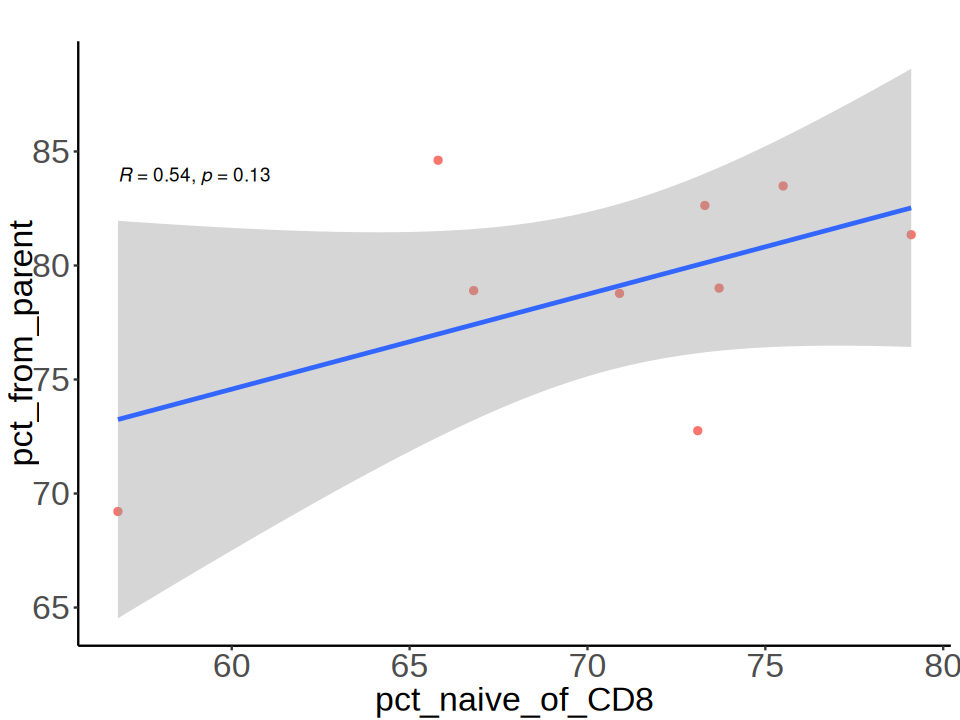

In [153]:
options(repr.plot.width = 8, repr.plot.height = 6)
 cd8_naive %>% 
dplyr::filter(prelim_final == "Prelim")  %>% 
ggplot(aes(x=pct_naive_of_CD8, y=pct_from_parent)) +
geom_point(shape = 16, size = 2, aes(color = factor(prelim_final))) +
 geom_smooth(method=lm) + ggtitle("") +stat_cor() + theme_classic() + ggtheme() +
 scale_y_continuous() + NoLegend() 

In [154]:
ggsave("../figures/correlation_facs_scRNAseq/cd8_naive.png", 
       create.dir = TRUE,
       width = 10, height = 10, units = "cm")
ggsave("../figures/correlation_facs_scRNAseq/cd8_naive.svg", 
       width = 10, height = 10, units = "cm")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


### Tgd

We will repeat the process for Tgd cells. 

In [176]:
cd8_tgd  <- data.frame(pct_tgd_of_CD8 = extra_gating$`FlowAIGoodEvents/Lymphocytes/Single Cells/Single Cells/Via, SSC-A subset/CD3, SSC-A subset/gdT | Freq. of Parent`, 
                         Patient_Time = paste0(extra_gating$Patient_ID, " T",extra_gating$TimePoint))

In [177]:
population_freq_cd8

...1,Sample_ID,annotations,annot_l1,annot_l2,n,Condition,Condition2,Disease,Sex,⋯,Experiment_ID,Level,freq_from_total,Parent_annotation,total_per_patient,freq_from_parent,pct_from_total,pct_from_parent,Main,prelim_final
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,150,CD8 NK cells,CD8 NK cells,NA,2,Dia T0,Part_remission_1,Dia,M,⋯,Exp08,L1,0.002212389,CD8,NA,NA,0.2212389,NA,CD8,Final
2,150,CD8 T cells,CD8 T cells,NA,900,Dia T0,Part_remission_1,Dia,M,⋯,Exp08,L1,0.995575221,CD8,NA,NA,99.5575221,NA,CD8,Final
3,150,CD8 Unconventional T cells,CD8 Unconventional T cells,NA,2,Dia T0,Part_remission_1,Dia,M,⋯,Exp08,L1,0.002212389,CD8,NA,NA,0.2212389,NA,CD8,Final
4,153,CD8 NK cells,CD8 NK cells,NA,4,Dia T0,Part_remission_0,Dia,F,⋯,Exp08,L1,0.004550626,CD8,NA,NA,0.4550626,NA,CD8,Final
5,153,CD8 T cells,CD8 T cells,NA,869,Dia T0,Part_remission_0,Dia,F,⋯,Exp08,L1,0.988623436,CD8,NA,NA,98.8623436,NA,CD8,Final
6,153,CD8 Unconventional T cells,CD8 Unconventional T cells,NA,6,Dia T0,Part_remission_0,Dia,F,⋯,Exp08,L1,0.006825939,CD8,NA,NA,0.6825939,NA,CD8,Final
7,152,CD8 NK cells,CD8 NK cells,NA,18,Dia T0,Part_remission_1,Dia,M,⋯,Exp08,L1,0.019417476,CD8,NA,NA,1.9417476,NA,CD8,Final
8,152,CD8 T cells,CD8 T cells,NA,889,Dia T0,Part_remission_1,Dia,M,⋯,Exp08,L1,0.959007551,CD8,NA,NA,95.9007551,NA,CD8,Final
9,152,CD8 Unconventional T cells,CD8 Unconventional T cells,NA,20,Dia T0,Part_remission_1,Dia,M,⋯,Exp08,L1,0.021574973,CD8,NA,NA,2.1574973,NA,CD8,Final


In [178]:
population_freq_cd8_tgd  <- population_freq_cd8  %>% dplyr::filter(Level == "L1" & annot_l1 == "CD8 Unconventional T cells")  %>% 
mutate(Patient_Time = paste(Patient_ID, Time))  %>% 
dplyr::select(Patient_Time, pct_from_total, prelim_final)

In [179]:
population_freq_cd8_tgd

Patient_Time,pct_from_total,prelim_final
<chr>,<dbl>,<chr>
105 T0,0.2212389,Final
106 T0,0.6825939,Final
104 T0,2.1574973,Final
108 T0,3.1823745,Final
111 T0,7.4795082,Final
110 T0,2.8441411,Final
209 T0,8.0436941,Prelim
127 T0,6.9923372,Prelim
121 T0,8.3408885,Prelim


In [180]:
cd8_tgd  <- left_join(cd8_tgd, population_freq_cd8_tgd)

Joining with `by = join_by(Patient_Time)`


In [181]:
cd8_tgd

pct_tgd_of_CD8,Patient_Time,pct_from_total,prelim_final
<dbl>,<chr>,<dbl>,<chr>
9.92,101 T1,10.5748758,Final
26.40,107 T0,5.7264957,Prelim
26.40,107 T0,10.6049822,Final
10.20,102 T1,10.3030303,Final
20.90,107 T1,16.0087719,Final
17.40,103 T1,12.3297491,Final
22.00,109 T0,10.1018676,Final
18.50,106 T1,13.6697248,Final
14.10,109 T1,10.0847458,Final


`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not f

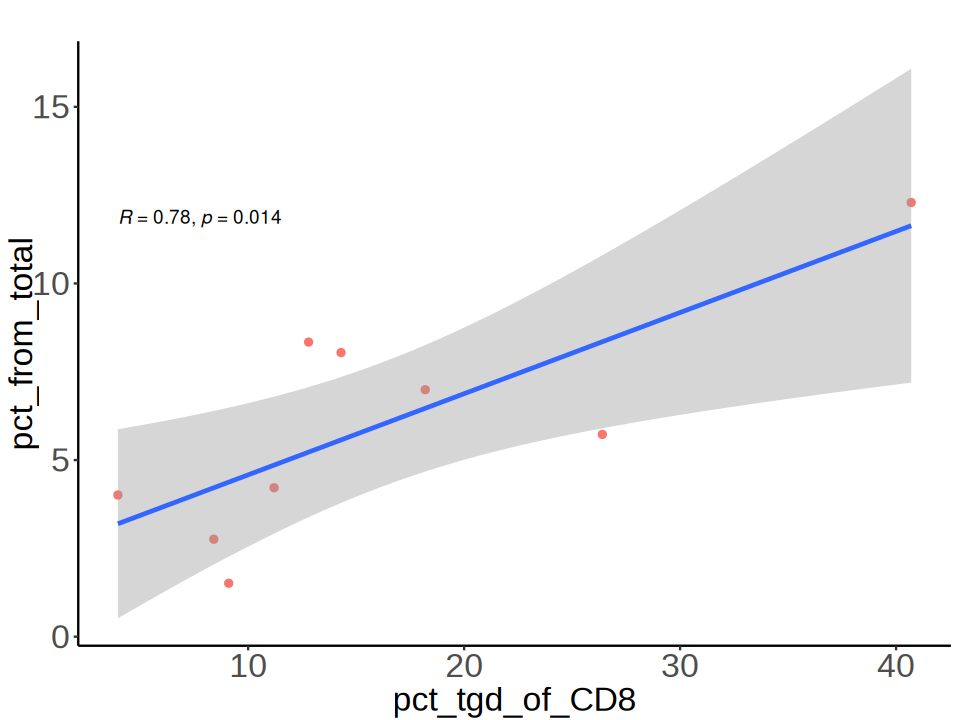

In [182]:
options(repr.plot.width = 8, repr.plot.height = 6)
 cd8_tgd %>% 
dplyr::filter(prelim_final == "Prelim")  %>% 
ggplot(aes(x=pct_tgd_of_CD8, y=pct_from_total)) +
geom_point(shape = 16, size = 2, aes(color = factor(prelim_final))) +
 geom_smooth(method=lm) + ggtitle("") +stat_cor() + theme_classic() + ggtheme() +
 scale_y_continuous() + NoLegend() 

In [183]:
ggsave("../figures/correlation_facs_scRNAseq/cd8_tgd.png", 
       create.dir = TRUE,
       width = 10, height = 10, units = "cm")
ggsave("../figures/correlation_facs_scRNAseq/cd8_tgd.svg", 
       width = 10, height = 10, units = "cm")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
